In [187]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn.linear_model import LogisticRegression
import sklearn 

from sklearn import preprocessing, neighbors, model_selection 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')



In [215]:
df_test = pd.read_csv(os.path.join('datasets', 'titanic-test.csv')) 
df = pd.read_csv(os.path.join('datasets', 'titanic-train.csv')) 

surv = df[df['Survived']== 1 ]

nosurv = df[df["Survived"] == 0]


In [216]:
Sex = pd.get_dummies(df['Sex'], prefix = None )
Sex.columns = ["Male", "Female"]

df.Sex = Sex.Female



In [190]:
df

,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
0,1302,1,1,"Earnshaw, Mrs. Boulton (Olive Potter)",0.0,...,1,11767,83.1583,C,1302
1,17,0,3,"van Billiard, Master. Walter John",1.0,...,1,A/5. 851,14.5000,S,17
2,1049,1,1,"Frauenthal, Dr. Henry William",1.0,...,0,PC 17611,133.6500,S,1049
3,388,1,3,"Stranden, Mr. Juho",1.0,...,0,STON/O 2. 3101288,7.9250,S,388
4,1060,1,2,"Davis, Miss. Mary",0.0,...,0,237668,13.0000,S,1060
...,...,...,...,...,...,...,...,...,...,...,...
868,382,0,3,"Rice, Master. George Hugh",1.0,...,1,382652,29.1250,Q,382
869,529,0,1,"Smart, Mr. John Montgomery",1.0,...,0,113792,26.5500,S,529
870,1215,1,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",0.0,...,0,11778,55.4417,C,1215
871,923,1,2,"Brown, Miss. Edith Eileen",0.0,...,2,29750,39.0000,S,923


In [191]:
#change dummies to sex on test dataframe 
Sex = pd.get_dummies(df_test['Sex'], prefix = None )
Sex.columns = ["Male", "Female"]

df_test.Sex = Sex.Female


In [192]:
df_test

,Unnamed: 0,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Embarked,PassengerId
0,0,2,"Frost, Mr. Anthony Wood ""Archie""",1.0,NaN,...,0,239854,0.0000,S,0
1,2,3,"Danoff, Mr. Yoto",1.0,27.0,...,0,349219,7.8958,S,2
2,4,2,"Jefferys, Mr. Clifford Thomas",1.0,24.0,...,0,C.A. 31029,31.5000,S,4
3,6,3,"Sage, Miss. Ada",0.0,NaN,...,2,CA. 2343,69.5500,S,6
4,12,1,"Stahelin-Maeglin, Dr. Max",1.0,32.0,...,0,13214,30.5000,C,12
...,...,...,...,...,...,...,...,...,...,...,...
431,1293,3,"Nieminen, Miss. Manta Josefina",0.0,29.0,...,0,3101297,7.9250,S,1293
432,1297,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",0.0,30.0,...,0,31027,21.0000,S,1297
433,1298,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0.0,50.0,...,1,PC 17558,247.5208,C,1298
434,1301,3,"Goodwin, Master. Harold Victor",1.0,9.0,...,2,CA 2144,46.9000,S,1301


In [193]:
df.columns

Index(['Unnamed: 0', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'PassengerId'],
      dtype='object')

In [194]:
df.describe()

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerId
count,873.000000,873.000000,873.000000,873.000000,701.000000,873.000000,873.000000,872.000000,873.000000
mean,648.357388,0.392898,2.300115,0.628866,29.560747,0.469645,0.387171,32.368950,648.357388
std,377.179578,0.488674,0.837325,0.483385,14.255972,0.932003,0.831667,50.535715,377.179578
min,1.000000,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,322.000000,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,NaN,322.000000
50%,638.000000,0.000000,3.000000,1.000000,NaN,0.000000,0.000000,NaN,638.000000
75%,972.000000,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,NaN,972.000000
max,1307.000000,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1307.000000


In [195]:
df.isnull().sum()


Unnamed: 0     0
Survived       0
Pclass         0
Name           0
Sex            0
              ..
Parch          0
Ticket         0
Fare           1
Embarked       2
PassengerId    0
dtype: int64

In [196]:
df_train.shape

(436, 11)

In [197]:
null_data = df[df.isnull().any(axis=1)]
null_data



,Unnamed: 0,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Embarked,PassengerId
10,458,1,3,"McCormack, Mr. Thomas Joseph",1.0,...,0,367228,7.7500,Q,458
22,762,0,1,"Harrington, Mr. Charles H",1.0,...,0,113796,42.4000,S,762
38,216,1,3,"Hee, Mr. Ling",1.0,...,0,1601,56.4958,S,216
40,1287,0,3,"Keefe, Mr. Arthur",1.0,...,0,323592,7.2500,S,1287
43,653,1,3,"Glynn, Miss. Mary Agatha",0.0,...,0,335677,7.7500,Q,653
...,...,...,...,...,...,...,...,...,...,...,...
842,259,1,3,"McGovern, Miss. Mary",0.0,...,0,330931,7.8792,Q,259
847,170,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",0.0,...,0,17770,27.7208,C,170
848,223,0,1,"Franklin, Mr. Thomas Parham",1.0,...,0,113778,26.5500,S,223
856,912,1,1,"Kenyon, Mrs. Frederick R (Marion)",0.0,...,0,17464,51.8625,S,912


In [198]:
#df.plot( kind = "scatter")

In [199]:
df.dropna(inplace = True)
df.Age.isnull().sum()

0

In [200]:
df.Survived.mean()


0.4183381088825215

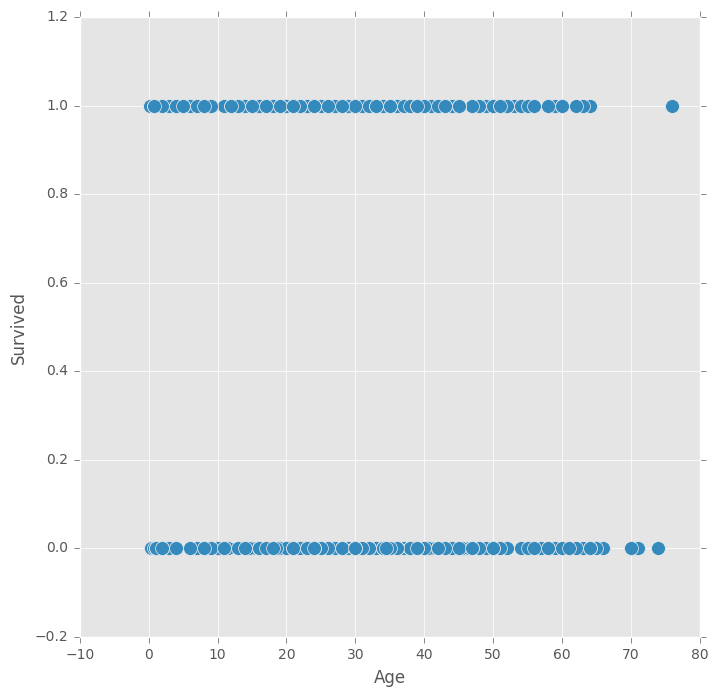

In [201]:
df.plot(kind = 'scatter', x = 'Age', y = 'Survived', s = 100, figsize = (8, 8))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a74f588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11aa8a438>]], dtype=object)

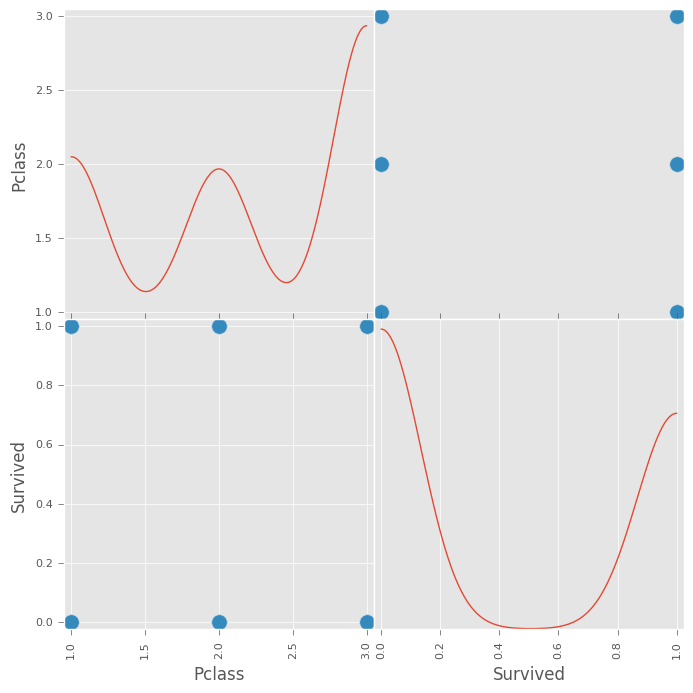

In [202]:
pd.tools.plotting.scatter_matrix(df[ ['Pclass', 'Survived'] ], diagonal = 'kde', s = 500, figsize = (8, 8))


In [203]:
#feature columns for Pclass & Parch 
feature_cols = ['Pclass', 'Parch']
X = df[feature_cols]
y = df.Survived



In [204]:

#create my model 
logreg = LogisticRegression()
logreg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
from sklearn.model_selection import cross_val_score 

cross_val_score(logreg, X, y, cv=5)

array([ 0.73758865,  0.67857143,  0.66906475,  0.69064748,  0.71223022])

In [206]:
#my coef look fine 

pd.DataFrame(X.columns, logreg.coef_[0])


,0
-0.864244,Pclass
0.373227,Parch


In [207]:
logreg.score(X, y)


0.70343839541547282

In [208]:
feature_cols = ["Sex","Fare","Age","Pclass"]
X = df[feature_cols]
y = df.Survived

logreg = LogisticRegression()
logreg.fit(X,y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [209]:
logreg.score(X,y)

0.77077363896848139

In [210]:

sklearn.crossval

AttributeError: module 'sklearn' has no attribute 'crossval'

In [217]:


columns_X = ['Age', 'Sex', 'Pclass', 'Fare']

X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)
c = df.Survived
model = neighbors.KNeighborsClassifier(n_neighbors = 5).\
   fit(X, c)
model.score(X, c)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
#scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')


In [ ]:
from sklearn.model_selection import cross_val_score 

cross_val_score(model, X, y, cv=5)

In [218]:
columns_X = ['Age', 'Sex', 'Pclass', 'Fare']
df = df.dropna()
X = df[columns_X]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)
c = df.Survived
model = neighbors.KNeighborsClassifier(n_neighbors = 5).\
   fit(X, c)
model.score(X, c)


0.84097421203438394

In [219]:
Sex = df_test.Sex.map({'male': 1 , 'female': 0})
df_test['Sex'] = Sex
df_test = df_test.dropna(inplace = True)
c_hat = model.predict(df_test[['Age','Sex','Pclass','Fare']])
df_test['Prediction'] = c_hat
df_test



TypeError: 'NoneType' object is not subscriptable